# Minimum Spanning Trees

## Algoritmi

Gli algoritmi da implementare sono tre:

- **Algoritmo di Prim** implementato con Heap
- **Algoritmo di Kruskal** nella sua implementazione "naive" di complessità O(mn)
- **Algoritmo di Kruskal** implementato con Union-Find

## Dataset

Il dataset contiene 68 grafi di esempio, di dimensione compresa tra 10 e 100000 vertici, generati in modo randomico con il TestCaseGenerator di [stanford-algs](https://github.com/beaunus/stanford-algs/tree/master/testCases/course3/assignment1SchedulingAndMST/question3). Ogni file descrive un grafo non orientato con pesi interi usando il seguente formato:

```
[numero_di_vertici] [numero_di_archi] 
[un_vertice_arco_1] [altro_vertice_arco_1] [peso_arco_1] 
[un_vertice_arco_2] [altro_vertice_arco_2] [peso_arco_2] 
[un_vertice_arco_3] [altro_vertice_arco_3] [peso_arco_3] 
...
```

Ad esempio, una riga "2 3 -8874" indica che esiste un arco che collega il vertice 2 al vertice 3 con peso -8874. NON si deve presumere che i pesi siano positivi, né che siano distinti.

## Domanda 1

Eseguite i tre algoritmi che avete implementato (Prim, Kruskal naive e Kruskal efficiente) sui grafi del dataset. Misurate i tempi di calcolo dei tre algoritmi e create un grafico che mostri la variazione dei tempi di calcolo al variare del numero di vertici nel grafo. Per ognuna delle istanze del problema, riportate il peso del minimum spanning tree ottenuto dagli algoritmi. 

## Domanda 2

Commentate i risultati che avete ottenuto: come si comportano gli algoritmi rispetto alle varie istanze? C'è un algoritmo che riesce sempre a fare meglio degli altri? Quale dei tre algoritmi che avete implementato è più efficiente?

## Cosa consegnare

- Una breve relazione sullo svolgimento del progetto. La relazione deve contenere:
  - una sezione introduttiva con la descrizione degli algoritmi e delle scelte implementative che avete fatto;
  - grafici esplicativi dei risultati con le risposte alle due domande;
  - eventuali originalità introdotte nell'elaborato o nell'implementazione;
  - una sezione conclusiva in cui porre i vostri commenti e le vostre conclusioni sull’elaborato svolto e i risultati ottenuti.
- Il codice sorgente dell’implementazione in un unico file di archivio (.zip, .tar.gz, ecc.).

## Note generali
- L'esercitazione si può implementare con qualsiasi linguaggio di programmazione. Strutture dati di base come liste, code, pile, insiemi, dizionari o mappe, messe a disposizione dalle librerie standard del linguaggio, sono utilizzabili senza restrizioni. Non è consentito utilizzare librerie che forniscono direttamente le strutture dati e gli algoritmi per rappresentare e manipolare grafi, come NetworkX, JGraphT o simili.
- Commenta le parti essenziali del codice in modo che sia possibile cogliere le idee che hanno portato alla scrittura di quel codice. I commenti aiuteranno a chiarire se un bug è un errore concettuale o solo un piccolo errore.
- Il laboratorio può essere svolto sia da soli che in gruppi di massimo tre persone.
- Solo uno dei componenti del gruppo consegna l'elaborato, indicando i nomi dei componenti del gruppo nella relazione e nello spazio sottostante.
- La prima esercitazione va consegnata entro le **ore 23:55 di lunedì 4 maggio.** Consegne in ritardo comportano una penalizzazione sul voto.

# Introduzione

Gli algoritmi implementati per la ricerca di un MST sono descritti in seguito.

## Algoritmo di Prim

### Prim di base

```
Prim(G,s)
  
  X = {s}
  A = empty;

  while edge in (u,v), u in X, v not in X:
    (u*, v*) = light edge
    add v* to X
    add (u*, v*) to A

  return A
```

### Prim con heap

```
Prim(G,s)
  foreach u in V:
    key[u] = infinity
    parent[u] = null
  key[s] = 0
  Q = V
  while Q not empty:
    u = extractMin(Q)
    foreach v adjacent_to u:
      if v in Q and w(u,v) < key[v]:
        parent[v] = u
        key[v] = w(u,v)
  return V\Q
```

### Scelte implementative

Abbiamo utilizzato una struttura Heap per estrarre il nodo con chiave minima in modo efficiente, con un costo pari a O(nlogn).

## Algoritmo di Kruskal naive

### Kruskal naive
```
Kruskal(G)
  A = {}
  sort edges of G by cost (mergesort)
  for each edge e in nondecreasing order of cost do:
    if A U {e} is acyclic then:
      A = A U {e}
  return A
```

### Scelte implementative

È stato implementato l'algoritmo di mergesort per ordinare i lati del grafo in base al loro peso.
Per controllare la ciclicità in modo da non avere un costo dell'algoritmo superiore a O(nm), i lati vengono controllati in base alle componenti connesse del MST in formazione. Se la componente connessa di entrambi i vertici su cui incide il lato è la medesima, c'è un ciclo, e il lato non viene aggiunto. Altrimenti si aggiunge e se necessario si usa DFS per aggiornare a un'unica componente connessa le due componenti che prima potevano essere sconnesse.

In [69]:
class Heap():

    def __init__(self):
        self._list = []
        self._ultimo = -1

    def push(self, value):
        self._ultimo += 1
        self._list.append(value)
        value._position = self._ultimo
        self._orderup(self._ultimo)

    def pop(self):
        if self._ultimo == -1:
            raise IndexError('Heap vuoto')

        min_value = self._list[0]
        self._list[0], self._list[self._ultimo] = self._list[self._ultimo], self._list[0]
        self._list[0]._position, self._list[self._ultimo]._position =\
            self._list[self._ultimo]._position, self._list[0]._position 
        self._ultimo -= 1
        self._orderdown(0)
        min_value.set_present(False)
        return min_value

    def _orderup(self, index):
        while index > 0:
            p_index, p_value = self._get_parent(index)
            if p_value <= self._list[index]:
                break
            self._list[p_index], self._list[index] = self._list[index], self._list[p_index]
            self._list[p_index]._position, self._list[index]._position =\
                self._list[index]._position, self._list[p_index]._position
            index = p_index

    def _orderdown(self, index):
        while index <= self._ultimo:
            value = self._list[index]
            left_child_index, left_child_value = self._get_left_child(index)
            right_child_index, right_child_value = self._get_right_child(index)
            if left_child_index <= self._ultimo and right_child_index <= self._ultimo:
                if value <= left_child_value and value <= right_child_value:
                    break
                if left_child_value < right_child_value:
                    new_index = left_child_index
                else:
                    new_index = right_child_index
            elif left_child_index <= self._ultimo and left_child_value <= value:
                new_index = left_child_index
            elif right_child_index <= self._ultimo and right_child_value <= value:
                new_index = right_child_index
            else:
                break
            self._list[new_index], self._list[index] = self._list[index], self._list[new_index]
            self._list[new_index]._position, self._list[index]._position =\
                self._list[index]._position, self._list[new_index]._position
            index = new_index

    def _get_parent(self, index: int):
        if index == 0:
            return -1, False
        p_index = (index - 1) // 2
        return p_index, self._list[p_index]

    def _get_left_child(self, index: int):
        left_child_index = 2 * index + 1
        if left_child_index > self._ultimo:
            return left_child_index, False
        return left_child_index, self._list[left_child_index]

    def _get_right_child(self, index: int):
        right_child_index = 2 * index + 2
        if right_child_index > self._ultimo:
            return right_child_index, False
        return right_child_index, self._list[right_child_index]

    def __len__(self):
        return self._ultimo + 1

    def __str__(self):
        result = "["
        for element in self._list:
            result += str(element.key()) + ","
        result += "]"
        return result

In [70]:
class Node():
    
    def __init__(self,name):
        self._name = name
        self._key = sys.maxsize
        self._parent = None
        self._position = None
        self._present = True
        self._edges = []

    def __gt__(self, other): 
        return self._key > other._key

    def __lt__(self, other): 
        return self._key < other._key

    def __le__(self, other): 
        return self._key <= other._key

    def __ge__(self, other): 
        return self._key >= other._key

    def __eq__(self, other): 
        return self._key == other._key

    def __ne__(self, other): 
        return self._key != other._key

    def name(self):
        return self._name

    def set_name(self,name):
        self._name = name

    def key(self):
        return self._key

    def set_key(self,key):
        self._key = key

    def parent(self):
        return self._parent

    def set_parent(self, parent):
        self._parent = parent

    def edges(self):
        return self._edges
    
    def add_edge(self, edge):
        self._edges.append(edge)

    def position(self):
        return self._position

    def present(self):
        return self._present

    def set_present(self,present):
        self._present = present
            
class Edge():

    def __init__(self, node, weight):
        self._node = node
        self._weight = weight

    def __gt__(self, other): 
        return self._weight > other._weight

    def __lt__(self, other): 
        return self._weight < other._weight

    def __le__(self, other): 
        return self._weight <= other._weight

    def __ge__(self, other): 
        return self._weight >= other._weight

    def __eq__(self, other): 
        return self._weight == other._weight

    def __ne__(self, other): 
        return self._weight != other._weight

    def weight(self):
        return self._weight

    def node(self):
        return self._node

In [71]:
class Graph():

    def __init__(self,n):
        self._nodes = [None] * n

    def add_node(self, name):
        if not self.is_node_present(name):
            node = Node(name)
            self._nodes[name] = node
            return node
        else:
            return self._nodes[name]

    def add_edge(self, src, dest, weight):
        edge = Edge(dest,weight)
        self._nodes[src.name()].add_edge(edge)
        edge2 = Edge(src,weight)
        self._nodes[dest.name()].add_edge(edge2)

    def get_graph(self):
        return self._nodes

    def is_node_present(self,name):
        return self._nodes[name] is not None

MST input_random_02_10.txt weight: 2126
MST input_random_10_40.txt weight: -37021
MST input_random_18_100.txt weight: -271743
MST input_random_26_400.txt weight: -788168
MST input_random_33_1000.txt weight: -2091110
MST input_random_41_4000.txt weight: -8722212
MST input_random_48_8000.txt weight: -18190442
MST input_random_59_40000.txt weight: -88783643
MST input_random_03_10.txt weight: -44765
MST input_random_04_10.txt weight: 20360
MST input_random_05_20.txt weight: -32021
MST input_random_06_20.txt weight: 18596
MST input_random_07_20.txt weight: -42560
MST input_random_08_20.txt weight: -37205
MST input_random_09_40.txt weight: -122078
MST input_random_19_100.txt weight: -288906
MST input_random_20_100.txt weight: -232178
MST input_random_21_200.txt weight: -510185
MST input_random_22_200.txt weight: -515136
MST input_random_23_200.txt weight: -444357
MST input_random_24_200.txt weight: -393278
MST input_random_25_400.txt weight: -1122919
MST input_random_34_1000.txt weight: -193

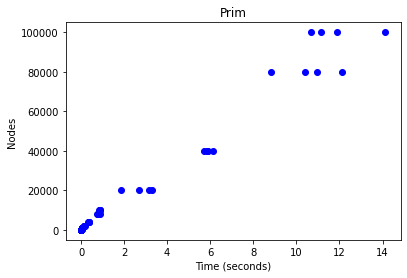

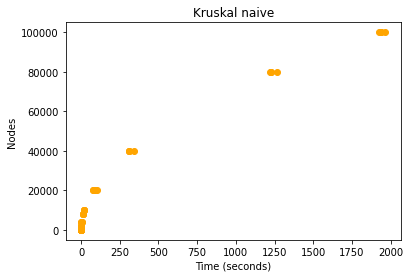

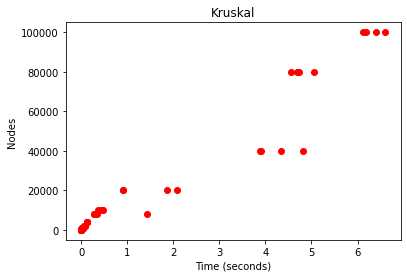

In [72]:
import os
import sys
import time
import matplotlib.pyplot as plt

def prim(graph, s):
    mst_weight = 0
    adjacency_list = graph.get_graph()
    adjacency_list[s].set_key(0)
    heap_keys = Heap()
    for node in adjacency_list:
        heap_keys.push(node)
    while len(heap_keys) !=0:
        u = heap_keys.pop()
        adjacents = adjacency_list[u.name()].edges()
        for edge in adjacents:
            v = edge.node()
            if( v.present() and edge.weight() < v.key()):
                v.set_parent(u)
                v.set_key(edge.weight())
                heap_keys._orderup(v._position)
        mst_weight += u.key()
    return mst_weight    

def read_file(filename):
    file = open(filename, "r")
    vertici, archi = list(map(int, file.readline().split()))
    graph = Graph(vertici)
    for line in file:
        tripla = list(map(int, line.split()))
        src = graph.add_node(tripla[0]-1)
        dest = graph.add_node(tripla[1]-1)
        graph.add_edge(src, dest, tripla[2])
    file.close()
    return graph

def read_file_time(filename):
    dictionary = {}
    file = open(filename, "r")
    file.readline()
    for line in file:
        (algorithm, time) = line.split(":")
        dictionary[algorithm] = float(time.strip("\n "))
    return dictionary     
    
def main(folder):
    with os.scandir(folder) as it:
        for i,entry in enumerate(it):
            if "input_random" in entry.name:
                graph = read_file(folder+"/"+entry.name)
                start = time.time()
                weight = prim(graph, 0)
                time_exec = time.time() - start
                test = entry.name.replace("input_random","output_random")
                with open(folder+"/"+test) as f:
                    result = int(f.read().split()[0])
                    if weight != result:
                        print("Our result: "+str(weight))
                        print("Correct: "+str(result))
                        print("Graph: "+str(entry.name))
                        break
                    else:
                        result_time = open(folder+"/"+test+"_time", "a")
                        result_time.write("\nPrim: "+str(time_exec))
                        result_time.close()


def diagramma(times, algorithm, color):
    for node in times:
        for time in times[node]:
            plt.scatter(x=float(time[algorithm]), y=int(node), c=color)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Nodes")
    plt.title(algorithm)     
    plt.show()

def diagrammi(folder):
    times = {}
    with os.scandir(folder) as it:
        for i,entry in enumerate(it):
            if "time" in entry.name:
                nodes = str(entry.name.replace("output_random_","").replace(".txt_time","")[3:])
                if not nodes in times:
                    times[nodes] = []
                times[nodes].append(read_file_time(folder+"/"+entry.name))    
        diagramma(times, "Prim", "blue")
        diagramma(times, "Kruskal naive", "orange")
        diagramma(times, "Kruskal", "red")   

def mst_weight(folder):
    with os.scandir(folder) as it:
        for i,entry in enumerate(it):
            if "output" in entry.name and "time" not in entry.name:
                file = open(folder+"/"+entry.name, "r")
                print("MST "+entry.name.replace("output","input")+" weight: "+file.readline())
                file.close()

if __name__ == "__main__":
    #main("mst-dataset")
    mst_weight("mst-dataset")
    diagrammi("mst-dataset")